Mounting Google Drive Storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Changing to Working Directory

In [ ]:
import os
os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107')
print('Current Directory :', os.getcwd(), '\nDirectory Contents:\n', os.listdir())

Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107 
Directory Contents:
 ['ab.zip', 'af.zip', 'am.zip', 'ar.zip', 'as.zip', 'az.zip', 'ba.zip', 'be.zip', 'bg.zip', 'bn.zip', 'bo.zip', 'br.zip', 'bs.zip', 'ca.zip', 'ceb.zip', 'cs.zip', 'cy.zip', 'da.zip', 'de.zip', 'el.zip', 'en.zip', 'eo.zip', 'es.zip', 'et.zip', 'eu.zip', 'fa.zip', 'fi.zip', 'fo.zip', 'fr.zip', 'gl.zip', 'gn.zip', 'gu.zip', 'gv.zip', 'ha.zip', 'haw.zip', 'hi.zip', 'hr.zip', 'ht.zip', 'hu.zip', 'hy.zip', 'ia.zip', 'id.zip', 'is.zip', 'it.zip', 'iw.zip', 'ja.zip', 'jw.zip', 'ka.zip', 'kk.zip', 'km.zip', 'kn.zip', 'ko.zip', 'la.zip', 'lb.zip', 'ln.zip', 'lo.zip', 'lt.zip', 'lv.zip', 'mg.zip', 'mi.zip', 'mk.zip', 'ml.zip', 'mn.zip', 'mr.zip', 'ms.zip', 'mt.zip', 'my.zip', 'ne.zip', 'nl.zip', 'nn.zip', 'no.zip', 'oc.zip', 'pa.zip', 'pl.zip', 'ps.zip', 'pt.zip', 'ro.zip', 'ru.zip', 'sa.zip', 'sco.zip', 'sd.zip', 'si.zip', 'sk.zip', 'sl.zip', 'sn.zip', 'so.zip', 'sq.z

In [ ]:
#Extracting Language Archives
#!unzip 'en.zip' -d 'Extracted Datasets' #English
#!unzip 'hi.zip' -d 'Extracted Datasets' #Hindi
#!unzip 'ta.zip' -d 'Extracted Datasets' #Tamil
#!unzip 'bn.zip' -d 'Extracted Datasets' #Bengali
#!unzip 'gu.zip' -d 'Extracted Datasets' #Gujarati
#!unzip 'ml.zip' -d 'Extracted Datasets' #Malayalam
#!unzip 'ne.zip' -d 'Extracted Datasets' #Nepali
#!unzip 'kn.zip' -d 'Extracted Datasets' #Kannada

Required Imports

In [13]:
pip install SoundFile

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fabric

     -------------------------------------- 53.3/53.3 kB 131.2 kB/s eta 0:00:00
     ------------------------------------- 162.2/162.2 kB 31.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip uninstall -y cryptography

Found existing installation: cryptography 37.0.1
Uninstalling cryptography-37.0.1:
  Successfully uninstalled cryptography-37.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gowth\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\gowth\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\uninstall.py", line 108, in run
    uninstall_pathset.commit()
  File "C:\Users\gowth\AppData\Roaming\Python\Python39\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Users\gowth\AppData\Roaming\Python\Python39\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Users\gowth\AppData\Roaming\Python\Python39\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\gowth\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\tenacity\__init__.py", line 328, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Us

In [7]:
pip install cryptography==36.0.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install ffmpeg

In [1]:
import librosa
import numpy as np
import time
import matplotlib.pyplot as plt
from librosa.display import specshow

Parameters

In [2]:
samplingRate = 22050

In [3]:
import os
os.chdir('D:/Major')
languages = sorted(os.listdir())
print('Current Directory :', os.getcwd(), '\nDirectory Contents:', languages)
nLanguages = len(languages)

Current Directory : D:\Major 
Directory Contents: ['en', 'gu', 'hi', 'kn']


Feature Extraction

In [4]:
maxFiles = 1000

for lanIndex in range(nLanguages):
    os.chdir('D:/Major')
    os.chdir(languages[lanIndex])
    audioFilenames = os.listdir()
    print('Current Directory :', os.getcwd(), '\nNumber of Files:', len(audioFilenames))

    startTime = time.time()
    audioFeatures = {}
  
    for fileIndex in range(maxFiles):
        audioFile = audioFilenames[fileIndex]
        audioSignal = librosa.load(audioFile)[0]
        mfcc = librosa.feature.mfcc(y=audioSignal, sr=samplingRate, n_mfcc = 13)
        delta = librosa.feature.delta(mfcc, order = 1)
        deltaDelta = librosa.feature.delta(mfcc, order = 2)
        audioFeatures[fileIndex] = np.concatenate((mfcc, delta, deltaDelta))

    os.chdir('D:/Major')
    np.save('{0}AudioFeatures.npy'.format(languages[lanIndex]), audioFeatures, allow_pickle = True)
    totalTime = time.time() - startTime
    print('Average Time Taken per File = ', totalTime/maxFiles, 's\nTotal Time Taken = ', totalTime, 's')

Current Directory : D:\Major\en 
Number of Files: 15860
Average Time Taken per File =  0.16300353121757508 s
Total Time Taken =  163.00353121757507 s
Current Directory : D:\Major\gu 
Number of Files: 17896
Average Time Taken per File =  0.1760926971435547 s
Total Time Taken =  176.0926971435547 s
Current Directory : D:\Major\hi 
Number of Files: 29968
Average Time Taken per File =  0.16374500012397766 s
Total Time Taken =  163.74500012397766 s
Current Directory : D:\Major\kn 
Number of Files: 17272
Average Time Taken per File =  0.17436006259918213 s
Total Time Taken =  174.36006259918213 s


Feature Padding

In [5]:
os.chdir('D:/Major')
maxDim = np.NINF

for lanIndex in range(nLanguages):
    audioFeatures = np.load('{0}AudioFeatures.npy'.format(languages[lanIndex]), allow_pickle = True)[()]
    for fileIndex in range(len(audioFeatures)):
        nFrames = audioFeatures[fileIndex].shape[1]
        if maxDim < audioFeatures[fileIndex].shape[1]:
            maxDim = nFrames

padInfoMatrix = []
outputLabelMatrix = []
featureMatrix = []

for lanIndex in range(nLanguages):
    lanPadInfoList = []
    audioFeatures = np.load('{0}AudioFeatures.npy'.format(languages[lanIndex]), allow_pickle = True)[()]
    outputLabelList = []
    featureList = []

    for fileIndex in range(len(audioFeatures)):
        audioFile = audioFeatures[fileIndex]
        lanPadInfoList.append(maxDim - audioFile.shape[1])
        audioFeatures[fileIndex] = np.pad(audioFile, ((0, 0), (0, maxDim - audioFile.shape[1])), 'constant', constant_values = 0)
        featureList.append(audioFeatures[fileIndex])

    #sampleLabel = audioFile.shape[1]*[lanIndex + 1]
    #padRegionLabel = (maxDim - audioFile.shape[1])*[0]
    #sampleLabel.extend(padRegionLabel)
    #outputLabelList.append(np.array(sampleLabel))
        outputLabelList.append(lanIndex + 1)

    padInfoMatrix.append(np.array(lanPadInfoList))
    outputLabelMatrix.append(np.array(outputLabelList))
    featureMatrix.append(np.array(featureList))

padInfoMatrix = np.array(padInfoMatrix)
outputLabelMatrix = np.array(outputLabelMatrix)
featureMatrix = np.array(featureMatrix)

np.save('outputLabels.npy', outputLabelMatrix, allow_pickle = True)
np.save('padInformationMatrix.npy', padInfoMatrix, allow_pickle = True)
np.save('featureMatrix.npy', featureMatrix, allow_pickle = True)

print(outputLabelMatrix.shape, featureMatrix.shape, padInfoMatrix.shape)

(4, 1000) (4, 1000, 39, 862) (4, 1000)


Sample Melspectrogram

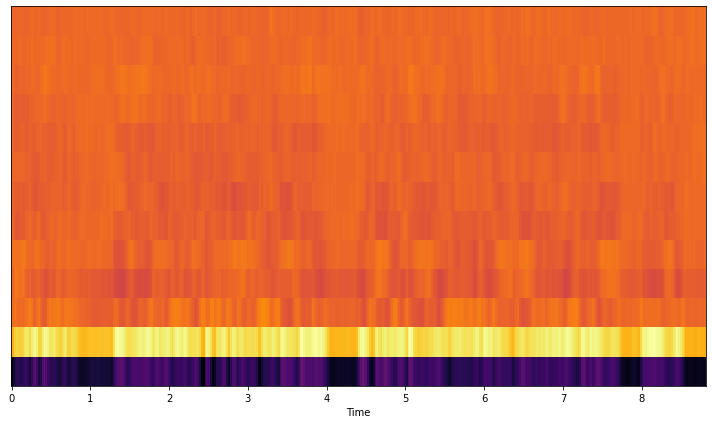

In [6]:
os.chdir('D:/Major/en')
audioFile = librosa.load(os.listdir()[0])[0]
mfcc = librosa.feature.mfcc(y=audioSignal, sr=samplingRate, n_mfcc = 13)
delta = librosa.feature.delta(mfcc, order = 1)
deltaDelta = librosa.feature.delta(mfcc, order = 2)
plt.figure(figsize = (10, 6))
specshow(mfcc, cmap = 'inferno', x_axis = 'time')
plt.tight_layout()

In [7]:
outputLabelMatrix

array([[1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [3, 3, 3, ..., 3, 3, 3],
       [4, 4, 4, ..., 4, 4, 4]])

In [8]:
padInfoMatrix[1][999]

722

In [9]:
print(outputLabelMatrix)

[[1 1 1 ... 1 1 1]
 [2 2 2 ... 2 2 2]
 [3 3 3 ... 3 3 3]
 [4 4 4 ... 4 4 4]]


In [22]:
import os
os.chdir('D:/Major')
featureFiles = os.listdir()
print('Current Directory :', os.getcwd(), '\nDirectory Contents:\n', featureFiles)

Current Directory : D:\Major 
Directory Contents:
 ['en', 'enAudioFeatures.npy', 'featureMatrix.npy', 'gu', 'guAudioFeatures.npy', 'hi', 'hiAudioFeatures.npy', 'kn', 'knAudioFeatures.npy', 'outputLabels.npy', 'padInformationMatrix.npy']


In [12]:
import numpy as np

In [13]:
featureMatrix = np.load('featureMatrix.npy', allow_pickle = True)
outputLabelMatrix = np.load('outputLabels.npy', allow_pickle = True)
padInfoMatrix = np.load('padInformationMatrix.npy', allow_pickle = True)

print(outputLabelMatrix.shape, featureMatrix.shape, padInfoMatrix.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'featureMatrix.npy'

In [25]:
nLanguages = 4
maxFiles = 1000

In [26]:
combinedFeatureList = []
combinedOutputLabelList = []

for lanIndex in range(nLanguages):
    for fileIndex in range(maxFiles):
        combinedFeatureList.append(featureMatrix[lanIndex][fileIndex].flatten())
        combinedOutputLabelList.append(outputLabelMatrix[lanIndex][fileIndex])

combinedFeatureList = np.array(combinedFeatureList)
combinedOutputLabelList = np.array(combinedOutputLabelList)

print(combinedFeatureList.shape, combinedOutputLabelList.shape)

(4000, 33618) (4000,)


In [27]:
encodedOutputLabelList = np.zeros((combinedOutputLabelList.shape[0], combinedOutputLabelList.max() + 1))
encodedOutputLabelList[np.arange(combinedOutputLabelList.shape[0]), combinedOutputLabelList] = 1
print(encodedOutputLabelList.shape)

(4000, 5)


In [28]:
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(combinedFeatureList, encodedOutputLabelList, test_size=0.2, random_state = 33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3200, 33618) (800, 33618) (3200, 5) (800, 5)


In [30]:
model = Sequential()
model.add(Dense(200, input_shape = (combinedFeatureList.shape[1], ), activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               6723800   
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 255       
Total params: 6,774,355
Trainable params: 6,774,355
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(x_train, y_train, epochs = 22, batch_size = 2000, validation_data=(x_test, y_test))

Epoch 1/22
2/2 [==============================] - 10s 1s/step - loss: 14.3863 - accuracy: 0.1619 - val_loss: 8.2382 - val_accuracy: 0.2862
Epoch 2/22
2/2 [==============================] - 0s 255ms/step - loss: 8.7520 - accuracy: 0.2691 - val_loss: 12.2271 - val_accuracy: 0.2550
Epoch 3/22
2/2 [==============================] - 0s 182ms/step - loss: 9.7655 - accuracy: 0.2878 - val_loss: 10.5458 - val_accuracy: 0.3475
Epoch 4/22
2/2 [==============================] - 0s 168ms/step - loss: 9.5183 - accuracy: 0.3222 - val_loss: 6.4209 - val_accuracy: 0.4375
Epoch 5/22
2/2 [==============================] - 0s 263ms/step - loss: 5.5649 - accuracy: 0.4278 - val_loss: 6.5562 - val_accuracy: 0.3050
Epoch 6/22
2/2 [==============================] - 0s 193ms/step - loss: 5.5463 - accuracy: 0.4028 - val_loss: 3.7023 - val_accuracy: 0.4263
Epoch 7/22
2/2 [==============================] - 0s 245ms/step - loss: 3.2968 - accuracy: 0.4416 - val_loss: 4.4068 - val_accuracy: 0.3825
Epoch 8/22
2/2 [===

In [37]:
trueOutput = [np.where(r==1)[0][0] for r in encodedOutputLabelList]
predictedOutput = np.argmax(model.predict(combinedFeatureList), axis=-1)
predictedOutput

 

array([2, 2, 1, ..., 4, 4, 4], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(trueOutput, predictedOutput)

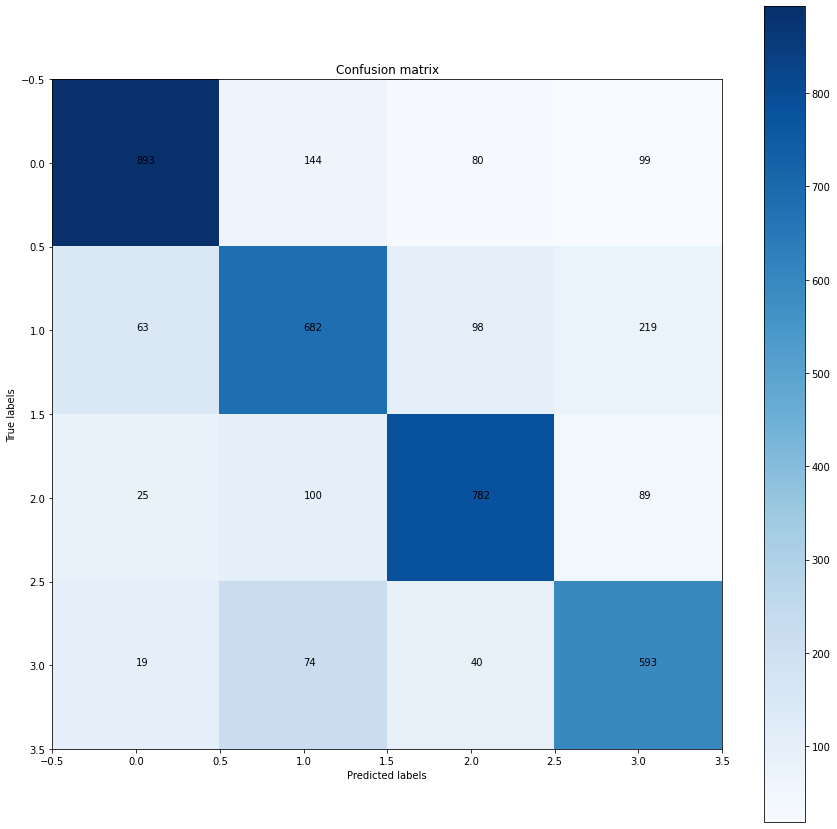

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15, 15))
plt.imshow(cm, cmap = plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion matrix')
for i in range(4):
    for j in range(4):
        plt.annotate(cm[i][j], (i, j))
plt.colorbar()
plt.show()

In [42]:
combinedFeatureList = []
combinedOutputLabelList = []

for lanIndex in range(nLanguages):
    for fileIndex in range(maxFiles):
        combinedFeatureList.append(featureMatrix[lanIndex][fileIndex])
        combinedOutputLabelList.append(outputLabelMatrix[lanIndex][fileIndex])

combinedFeatureList = np.array(combinedFeatureList)
combinedOutputLabelList = np.array(combinedOutputLabelList)

combinedFeatureList = combinedFeatureList.reshape(combinedFeatureList.shape[0], combinedFeatureList.shape[1], combinedFeatureList.shape[2], 1)

print(combinedFeatureList.shape, combinedOutputLabelList.shape)

(4000, 39, 862, 1) (4000,)


In [43]:
x_train, x_test, y_train, y_test = train_test_split(combinedFeatureList, encodedOutputLabelList, test_size=0.2, random_state = 33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3200, 39, 862, 1) (800, 39, 862, 1) (3200, 5) (800, 5)


In [44]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = combinedFeatureList.shape[1:]))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 37, 860, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 430, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 428, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 214, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 212, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 106, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 104, 256)      

In [45]:
history = model.fit(x_train, y_train, epochs = 3, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/3


ResourceExhaustedError:  OOM when allocating tensor with shape[500,32,37,860] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/conv2d/Conv2D (defined at \AppData\Local\Temp\ipykernel_2444\2450242676.py:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2849]

Function call stack:
train_function
